In [1]:
import numpy as np
from garuda.ops import obb_to_aa


In [2]:
obb_label_path_1 = "../data/region_performace/bihar_0.25/labels/9301471_2893597.txt"
aa_label_1 = obb_to_aa(obb_label_path_1)
print(aa_label_1)

[[2.        0.133113  0.8344295 0.013074  0.031053 ]
 [1.        0.040094  0.9056365 0.012914  0.022017 ]
 [1.        0.0402865 0.90117   0.016133  0.032362 ]]


In [3]:
obb_label_path_2 = "../data/region_performace/bihar_0.25/labels/9304223_2877087.txt"
aa_label_2 = obb_to_aa(obb_label_path_2)
print(aa_label_2)

[[2.        0.0932445 0.551485  0.020385  0.034326 ]
 [2.        0.166104  0.4097685 0.023572  0.037711 ]]


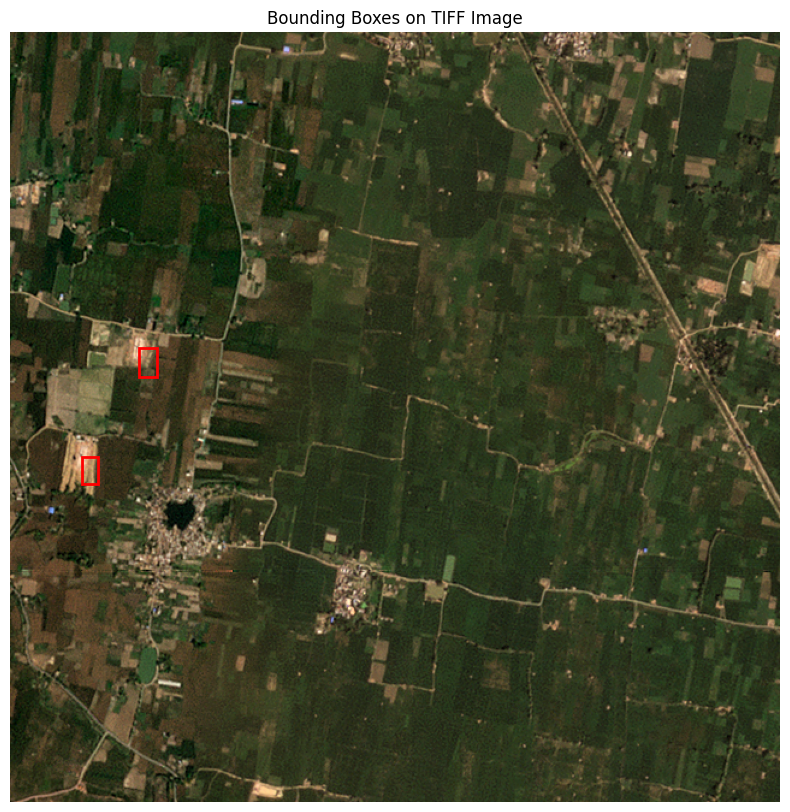

In [7]:
import rasterio
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Path to the .tif file
tiff_file = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/region_performace/bihar_0.25/images/9304223_2877087.tif"

# Open and visualize the TIFF file
with rasterio.open(tiff_file) as src:
    red=src.read(1)
    green=src.read(2)
    blue=src.read(3)
    image = np.dstack((red, green, blue))
    img_width = src.width
    img_height = src.height
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.imshow(image)
    for bbox in aa_label_2:
        class_id, xmin_norm, ymin_norm, width_norm, height_norm = bbox
        xmin = xmin_norm * img_width
        ymin = ymin_norm * img_height
        width = width_norm * img_width
        height = height_norm * img_height

        rect = Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    ax.set_title("Bounding Boxes on TIFF Image")
    ax.set_xlabel("Width (pixels)")
    ax.set_ylabel("Height (pixels)")
    ax.axis("off")  # Hide axes for better visualization
    plt.show()